**Below are the various steps followed to extract insights from the loans dataset for the lending club case study**
1. Understanding the data
2. Cleaning Columns & Rows
3. Data Preprocessing & Missing value imputation
4. Outlier treatment
5. Univariate analysis    
    5.1 Results from Univariate Analysis
6. Bivariate analysis
    6.1 Results from Bivariate Analysis

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 1. Understading the data

In [3]:
# Check the shape
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  39717
Columns :  111


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
print("Columns")
print("-"*50)
for col in df.columns:
    print(col)

Columns
--------------------------------------------------
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_

In [6]:
# Check for missing values
columns=[]
nulls=[]
for col in df.columns:
    if df[col].isna().sum() >0:
        columns.append(col)
        nulls.append(df[col].isna().sum())
missing_val_df=pd.DataFrame({'Feature':columns,'Nulls':nulls})
missing_val_df.sort_values(by='Nulls',ascending=False,inplace=True)
missing_val_df['Null_pct']=round((missing_val_df['Nulls']/39717)*100,2)

In [7]:
missing_val_df[missing_val_df['Null_pct']==100.0].reset_index(drop=True)

,Feature,Nulls,Null_pct
0,bc_open_to_buy,39717,100.0
1,acc_open_past_24mths,39717,100.0
2,bc_util,39717,100.0
3,mo_sin_old_il_acct,39717,100.0
4,mo_sin_old_rev_tl_op,39717,100.0
5,mo_sin_rcnt_rev_tl_op,39717,100.0
6,mo_sin_rcnt_tl,39717,100.0
7,mort_acc,39717,100.0
8,mths_since_recent_bc,39717,100.0
9,mths_since_recent_bc_dlq,39717,100.0


## 2. Cleaning Columns & Rows   
Below Columns & Rows cannot to be used for our analysis, hence they can be dropped.  

**<font color='green'>54 out of 111 columns are 100% empty. So, these columns can be dropped</font>**   
1. bc_open_to_buy
2. acc_open_past_24mths
3. bc_util
4. mo_sin_old_il_acct
5. mo_sin_old_rev_tl_op
6. mo_sin_rcnt_rev_tl_op
7. mo_sin_rcnt_tl
8. mort_acc
9. mths_since_recent_bc
10. mths_since_recent_bc_dlq
11. mths_since_recent_inq
12. mths_since_recent_revol_delinq
13. num_accts_ever_120_pd
14. num_actv_bc_tl
15. num_actv_rev_tl
16. num_bc_sats
17. num_bc_tl
18. num_il_tl
19. num_op_rev_tl
20. num_rev_accts
21. num_rev_tl_bal_gt_0
22. num_sats
23. num_tl_120dpd_2m
24. num_tl_30dpd
25. num_tl_90g_dpd_24m
26. num_tl_op_past_12m
27. pct_tl_nvr_dlq
28. percent_bc_gt_75
29. tot_hi_cred_lim
30. total_bal_ex_mort
31. total_bc_limit
32. avg_cur_bal
33. total_il_high_credit_limit
34. inq_last_12m
35. mths_since_rcnt_il
36. mths_since_last_major_derog
37. annual_inc_joint
38. dti_joint
39. verification_status_joint
40. tot_coll_amt
41. open_acc_6m
42. open_il_6m
43. open_il_12m
44. open_il_24m
45. tot_cur_bal
46. total_bal_il
47. open_rv_12m
48. open_rv_24m
49. max_bal_bc
50. all_util
51. total_rev_hi_lim
52. inq_fi
53. total_cu_tl  
54. il_util  

**<font color='green'>8 out of 111 columns have same values. So, these columns can be dropped</font>**      
55. pymnt_plan     
56. initial_list_status  
57. collections_12_mths_ex_med   
58. policy_code   
59. acc_now_delinq  
60. application_type  
61. tax_liens  
62. delinq_amnt  


**<font color='green'>4 out of 111 columns have irrelavent information. So, these columns can be dropped</font>**    


63. id   
64. member_id   
65. url     
66. zip_code      
67. title      
68. emp_title   
69. addr_state  
70. desc  
71. funded_amnt   

**<font color='green'>15 out of 111 columns are not directly related to loan approvals. So, these columns can be dropped</font>**    

72. delinq_2yrs
73. revol_bal
74. out_prncp
75. total_pymnt
76. total_rec_prncp
77. total_rec_int
78. total_rec_late_fee
79. recoveries
80. collection_recovery_fee
81. last_pymnt_d
82. last_pymnt_amnt
83. next_pymnt_d
84. chargeoff_within_12_mths
85. mths_since_last_delinq
86. mths_since_last_record    

**<font color='green'>1 out of 111 columns are redundent. 'funded_amnt_inv' is more relavent for analysis. hence 'funded_amnt' can be dropped</font>**      
87. funded_amnt    

**<font color='green'>1140 out of 39717 Rows with loan_status as Current are not useful to understand the reasons for deafaulting</font>**   



In [8]:
empty_columns=missing_val_df[missing_val_df['Null_pct']==100.0]['Feature']

constant_value_columns=['pymnt_plan', 
                        'initial_list_status',
                        'collections_12_mths_ex_med',
                        'policy_code',
                        'acc_now_delinq',
                        'application_type',
                         #'tax_liens', 
                        'delinq_amnt']

irrelavent_columns=['id', 
                    'member_id', 
                    'url',
                    'zip_code',
                    'title',
                    'emp_title',
                    'addr_state',
                    'desc']


not_approval_features=['last_credit_pull_d',
                       'out_prncp_inv',
                       'total_pymnt_inv',
                       'delinq_2yrs',
                       'revol_bal', 
                       'out_prncp', 
                       'total_pymnt', 
                       'total_rec_prncp', 
                       'total_rec_int', 
                       'total_rec_late_fee', 
                       'recoveries', 
                       'collection_recovery_fee', 
                       'last_pymnt_d', 
                       'last_pymnt_amnt', 
                       'next_pymnt_d' , 
                       'chargeoff_within_12_mths', 
                       'mths_since_last_delinq', 
                       'mths_since_last_record']

# dropping empty columns
df_clean=df.drop(list(empty_columns),axis=1)
# dropping the columns with constant values
df_clean=df_clean.drop(constant_value_columns,axis=1)
# dropping the columns which dosent have any useful information for analysis
df_clean=df_clean.drop(irrelavent_columns,axis=1)
# dropping redundant/not useful columns
df_clean=df_clean.drop('funded_amnt', axis=1)
# drop features not contributing to approval
df_clean=df_clean.drop(not_approval_features, axis = 1)
# dropping rows with loan status as current
df_clean=df_clean[df_clean['loan_status']!='Current']


# Check the shape
print("Rows    : ", df_clean.shape[0])
print("Columns : ", df_clean.shape[1])

Rows    :  38577
Columns :  23


### Data Preprocessing & Missing value imputation

In [9]:
df_clean.isna().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

In [10]:
# rounding the precision
df_clean['funded_amnt_inv']=df_clean['funded_amnt_inv'].apply(lambda x: round(x,2))

# cleaning the term feature
df_clean['term']=df_clean['term'].apply(lambda x: x.strip())
df_clean['term']=df_clean['term'].astype(str)

# Converting the int_rate to a continuous variable
df_clean['int_rate']=df_clean['int_rate'].apply(lambda x: x.replace("%",""))
df_clean['int_rate']=df_clean['int_rate'].apply(lambda x: float(x.strip()))

# Cleaning the grade and sub_grade features
df_clean['grade']=df_clean['grade'].apply(lambda x: x.strip())
df_clean['sub_grade']=df_clean['sub_grade'].apply(lambda x: x.strip())

# filling the missing values with mode
df_clean['emp_length']=df_clean['emp_length'].fillna(df_clean['emp_length'].mode()[0])


# convert to date time
df_clean['issue_d']=pd.to_datetime(df_clean['issue_d'], format='%b-%y')
df_clean['earliest_cr_line']=pd.to_datetime(df_clean['earliest_cr_line'], format='%b-%y')

# Cleaning and filling the missing values in the revol_util feature
df_clean['revol_util']=df_clean['revol_util'].fillna("unknown")
df_clean['revol_util']=df_clean['revol_util'].apply(lambda x: x.replace("%",""))
df_clean['revol_util']=df_clean['revol_util'].apply(lambda x: x if x=="unknown" else float(x.strip()))
df_clean['revol_util']=df_clean['revol_util'].replace("unknown",np.nan)
df_clean['revol_util']=df_clean['revol_util'].fillna(df_clean['revol_util'].mean())

# filling the missing values
df_clean['pub_rec_bankruptcies']=df_clean['pub_rec_bankruptcies'].fillna("None")
df_clean['tax_liens']=df_clean['tax_liens'].fillna(0)

# Since the class NONE are very few they are mixed in to the OTHER class
df_clean['home_ownership']=df_clean['home_ownership'].replace("NONE","OTHER")

In [11]:
df_clean.isna().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
tax_liens               0
dtype: int64

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt_inv       38577 non-null  float64       
 2   term                  38577 non-null  object        
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose         

### 4. Outlier Treatment

**Analysing the below variable for outliers**
1. loan_amnt
2. funded_amnt_inv
3. annual_inc
4. dti
5. revol_util

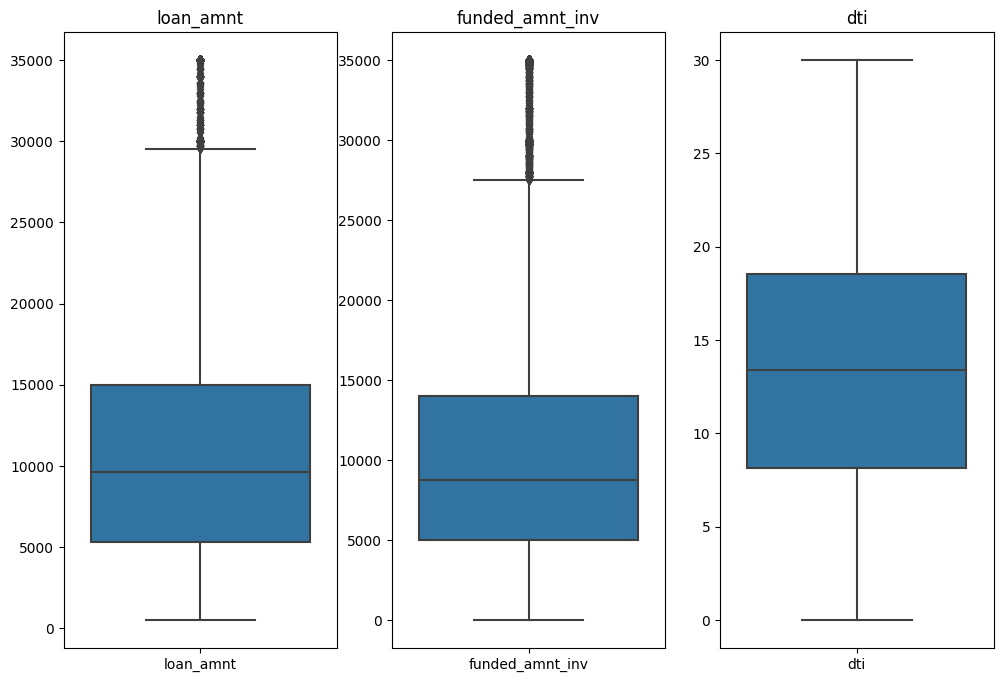

In [13]:
# Finding outliers
f, axs = plt.subplots(1, 3,figsize=(12, 8))
sns.boxplot(ax=axs[0],data=df_clean[['loan_amnt']])
axs[0].set_title('loan_amnt')

sns.boxplot(ax=axs[1],data=df_clean[['funded_amnt_inv']])
axs[1].set_title('funded_amnt_inv')

sns.boxplot(ax=axs[2],data=df_clean[['dti']])
axs[2].set_title('dti')

plt.show()

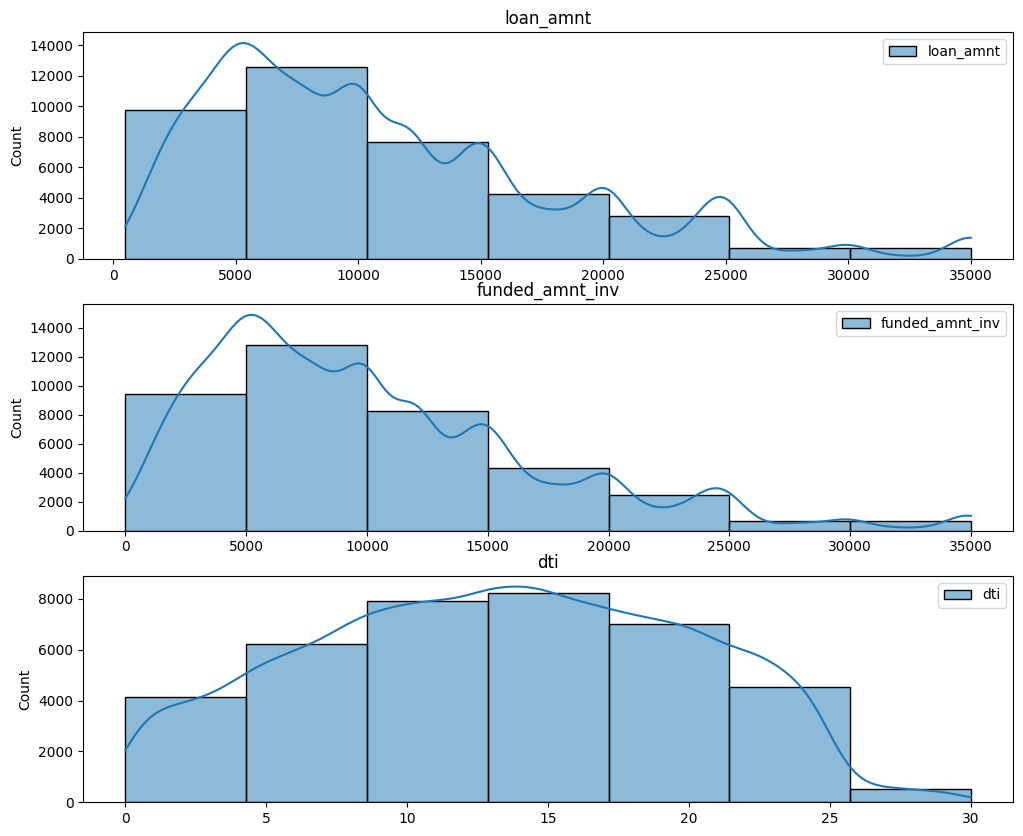

In [14]:
# plotting the distibution
f, axs = plt.subplots(3, 1,figsize=(12, 10))

sns.histplot(ax=axs[0],data=df_clean[['loan_amnt']],bins = 7, kde = True, cbar = True)
axs[0].set_title('loan_amnt')
sns.histplot(ax=axs[1],data=df_clean[['funded_amnt_inv']],bins = 7, kde = True, cbar = True)
axs[1].set_title('funded_amnt_inv')
sns.histplot(ax=axs[2],data=df_clean[['dti']],bins = 7, kde = True, cbar = True)
axs[2].set_title('dti')

plt.show()

Analysing the quantiles 

In [15]:
df_clean['loan_amnt'].quantile([0.5,0.75,0.90,0.95, 0.97,0.99])

0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [16]:
df_clean['funded_amnt_inv'].quantile([0.5,0.75,0.90, 0.95, 0.97,0.99])

0.50     8733.4400
0.75    14000.0000
0.90    19975.0000
0.95    24500.0660
0.97    25750.0000
0.99    34715.0136
Name: funded_amnt_inv, dtype: float64

In [17]:
df_clean['dti'].quantile([0.5,0.75,0.90, 0.95, 0.97,0.99])

0.50    13.37
0.75    18.56
0.90    22.29
0.95    23.80
0.97    24.51
0.99    26.53
Name: dti, dtype: float64

* **<font color='green'>The above 3 features have few values outside the upper fence but they are not extreme outliers</font>**   
* **<font color='green'>The distribution also not heavily skewed</font>**  
* **<font color='green'>The quantiles information is also not high variance. Hence they can be considered for the analysis</font>**  


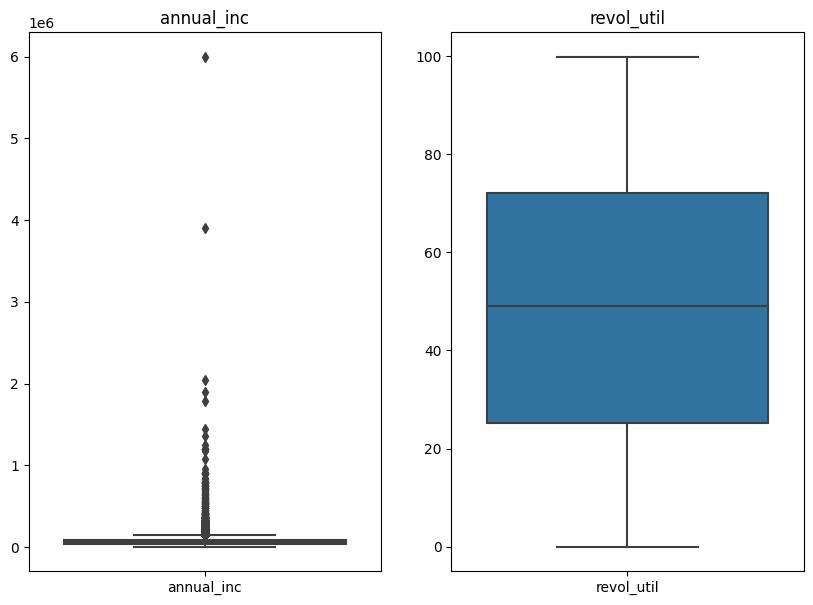

In [18]:
# Finding outliers

f, axs = plt.subplots(1, 2,figsize=(10, 7))
sns.boxplot(ax=axs[0],data=df_clean[['annual_inc']])
axs[0].set_title('annual_inc')

sns.boxplot(ax=axs[1],data=df_clean[['revol_util']])
axs[1].set_title('revol_util')

plt.show()

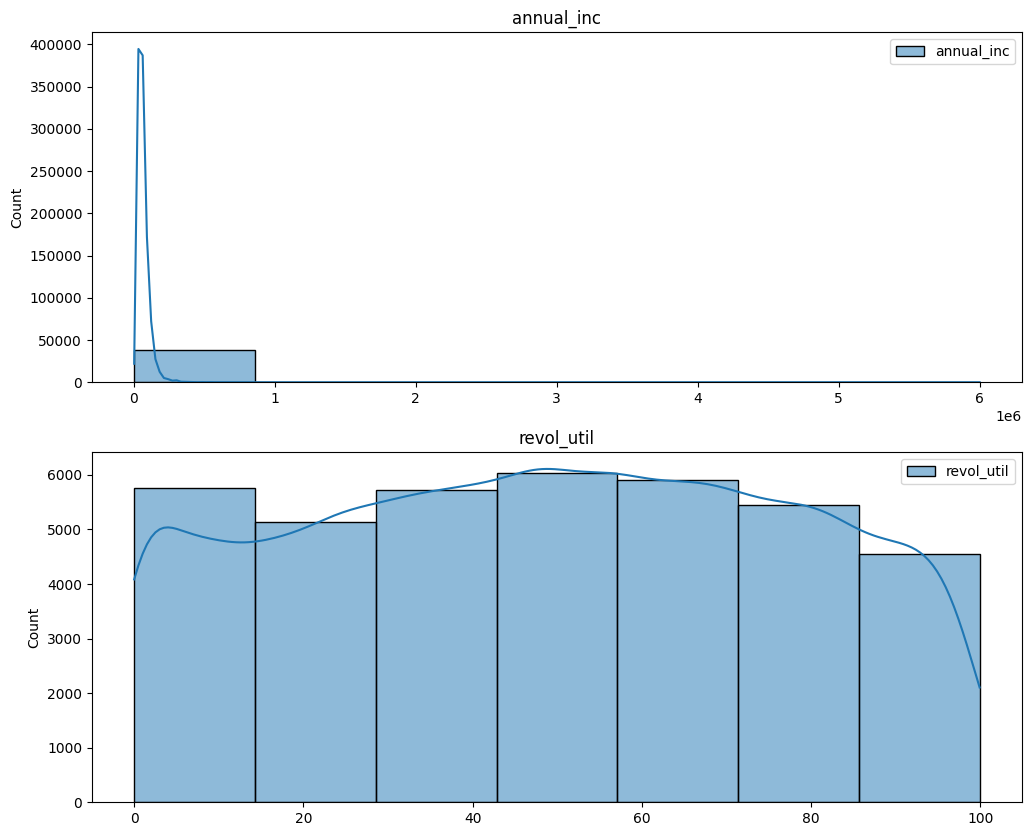

In [19]:
# plotting the distribution
f, axs = plt.subplots(2, 1,figsize=(12, 10))

sns.histplot(ax=axs[0],data=df_clean[['annual_inc']],bins = 7, kde = True, cbar = True)
axs[0].set_title('annual_inc')
sns.histplot(ax=axs[1],data=df_clean[['revol_util']],bins = 7, kde = True, cbar = True)
axs[1].set_title('revol_util')
plt.show()

In [20]:
df_clean['annual_inc'].quantile([0.5,0.75,0.90, 0.95, 0.97,0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [21]:
df_clean['revol_util'].quantile([0.5,0.75,0.90, 0.95, 0.97,0.99])

0.50    49.0
0.75    72.2
0.90    87.8
0.95    93.5
0.97    95.9
0.99    98.5
Name: revol_util, dtype: float64

* **<font color='green'>The feature annual_inc have extreme outliers, the distibution plot is heavily skewed and also there is a difference in the quantile values. Hence this feature needs outlier treatment</font>**   

In [22]:
annual_inc_treated = df_clean['annual_inc'].quantile(0.90)
df_clean = df_clean[df_clean['annual_inc'] <= annual_inc_treated]

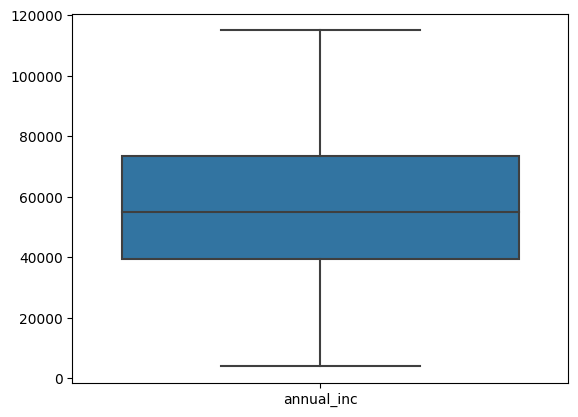

In [23]:
sns.boxplot(data=df_clean[['annual_inc']])
plt.show()

### 5. Univariate Analysis

**Categorical Variables**   
1. term  
2. grade
3. subgrade
4. emp_length
5. home_ownership
6. verification_status
7. purpose
8. pub_rec_bankruptcies
9. **<font color='red'>loan_status</font>**    

**Continuos Variables**           
10. loan_amnt  
11. funded_amnt_inv   
12. int_rate   
13. installment    
14. annual_inc   
15. dti  
16. inq_last_6mths  
17. open_acc   
18. pub_rec     
19. total_acc   
20. tax_liens      

**Temporal Variable**   
21. issued_d   
22. earliest_cr_line   

In [24]:
# binning numerical features
df_clean['int_rate_binned'] = pd.cut(df_clean['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df_clean['open_acc_binned'] = pd.cut(df_clean['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df_clean['revol_util_binned'] = pd.cut(df_clean['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df_clean['total_acc_binned'] = pd.cut(df_clean['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df_clean['annual_inc_binned'] = pd.cut(df_clean['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df_clean['installment_binned'] = pd.cut(df_clean['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df_clean['funded_amnt_inv_binned'] = pd.cut(df_clean['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
df_clean['loan_amnt_binned'] = pd.cut(df_clean['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df_clean['dti_binned'] = pd.cut(df_clean['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [25]:
# creating data frames with Charged Off and Fully Paid classes
df_charged_off=df_clean[df_clean['loan_status']=='Charged Off']
df_fully_paid=df_clean[df_clean['loan_status']=='Fully Paid']

In [26]:
# splitting the date column to create new columns for month and year
df_charged_off['issue_d_month']=df_charged_off['issue_d'].dt.month
df_charged_off['issue_d_year']=df_charged_off['issue_d'].dt.year

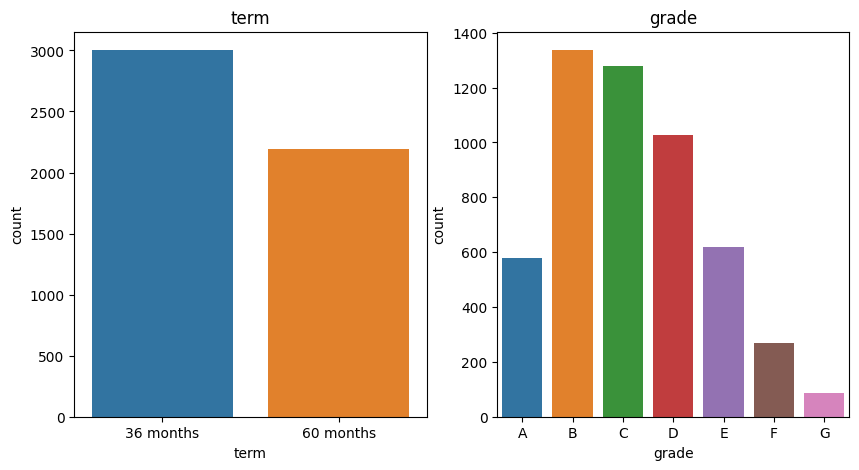

In [27]:
# count plots for analysiing term and grade
f, axs = plt.subplots(1, 2,figsize=(10, 5))
sns.countplot(ax=axs[0],x='term',data=df_charged_off, order=['36 months', '60 months'])
axs[0].set_title('term')

sns.countplot(ax=axs[1],x='grade',data=df_charged_off, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
axs[1].set_title('grade')

plt.show()

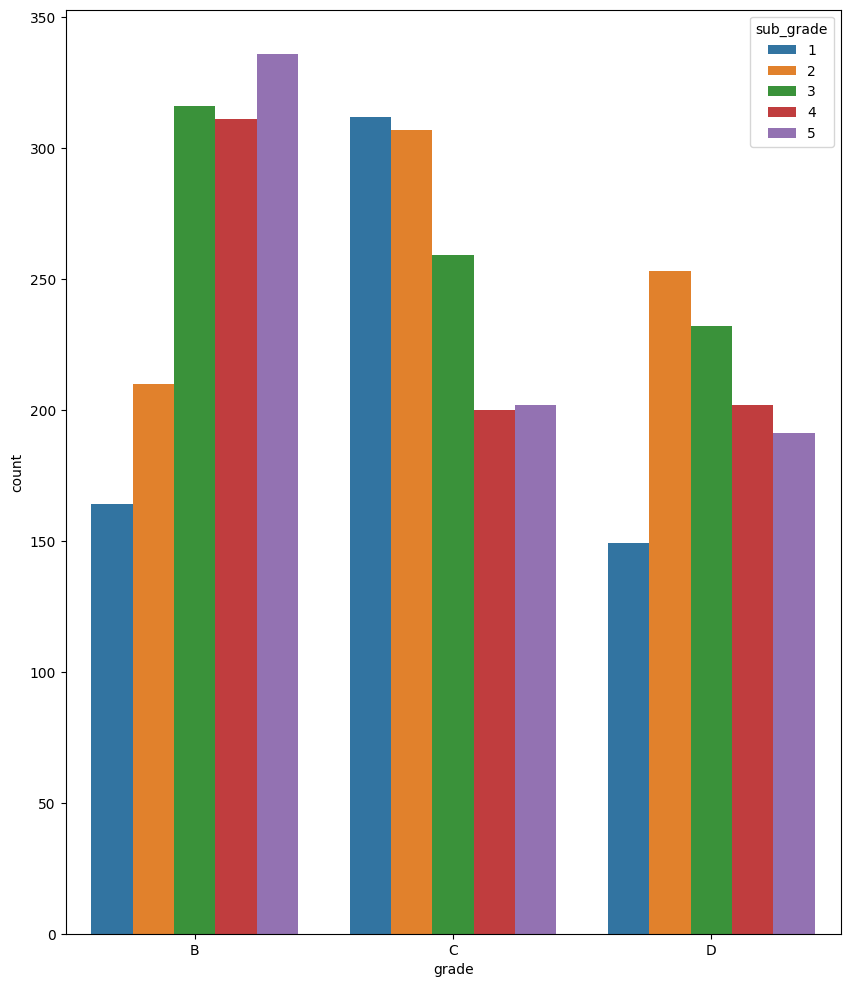

In [28]:
# count plots for analysisng grade and subgrade together
plt.figure(figsize=(10,12))
df_charged_off['sub_grade'] = pd.to_numeric(df_charged_off['sub_grade'].apply(lambda x : x[-1]))


sns.countplot(x='grade',
              data=df_charged_off[
                    (df_charged_off['grade']=='B') |
                    (df_charged_off['grade']=='C') |
                    (df_charged_off['grade']=='D') ],
              hue='sub_grade',
              order=['B', 'C', 'D'])

plt.show()

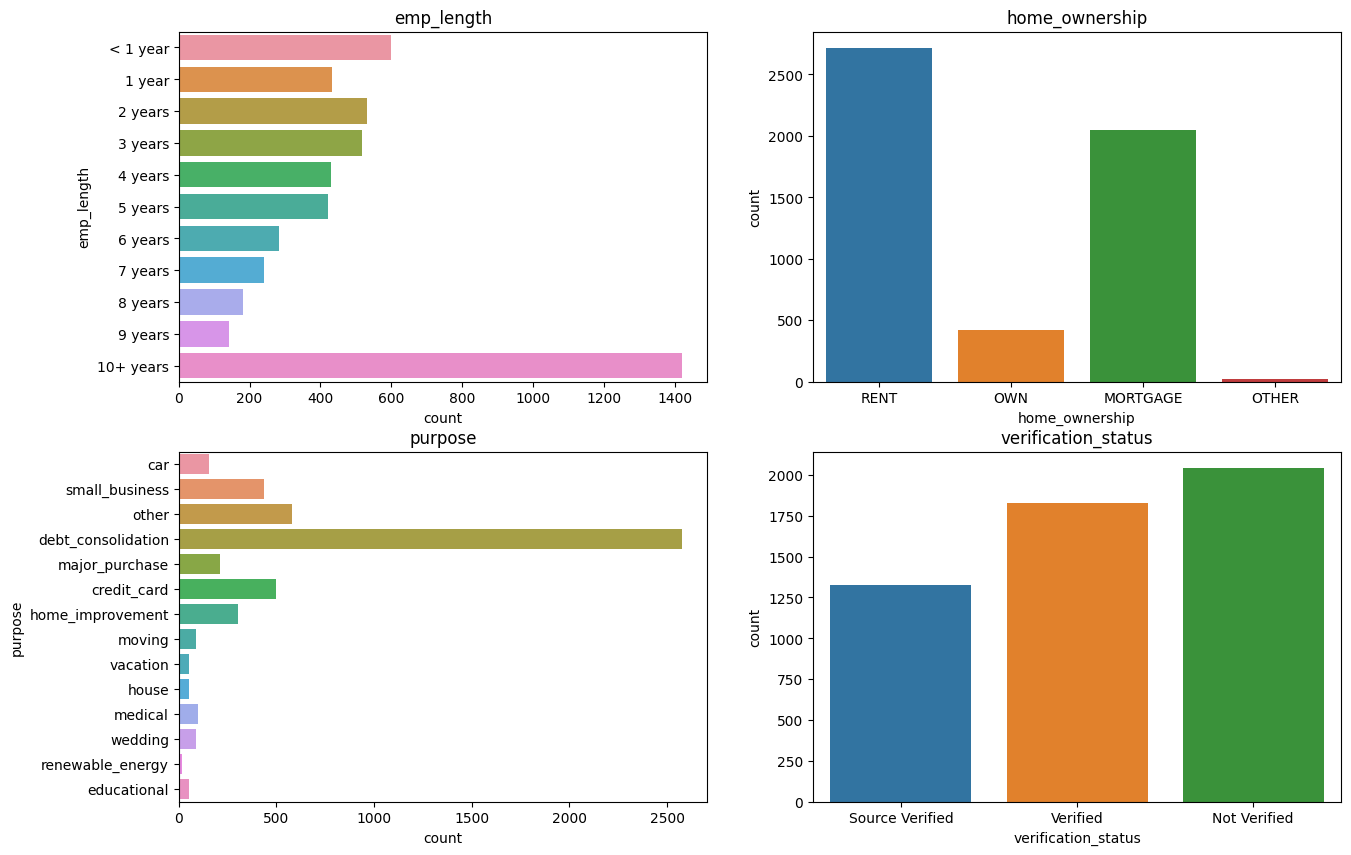

In [29]:
# count plot for emp_length , home_ownership , purpose and verfication_status
f, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axs[0][0],
              y='emp_length', 
              data=df_charged_off, 
              order=['< 1 year', 
                     '1 year',
                     '2 years', 
                     '3 years', 
                     '4 years', 
                     '5 years', 
                     '6 years',
                     '7 years', 
                     '8 years', 
                     '9 years', 
                     '10+ years'])
axs[0][0].set_title('emp_length')

sns.countplot(ax=axs[0][1], x='home_ownership', data=df_charged_off)
axs[0][1].set_title('home_ownership')

sns.countplot(ax=axs[1][0], y='purpose', data=df_charged_off)
axs[1][0].set_title('purpose')

sns.countplot(ax=axs[1][1], x='verification_status', data=df_charged_off)
axs[1][1].set_title('verification_status')



plt.show()

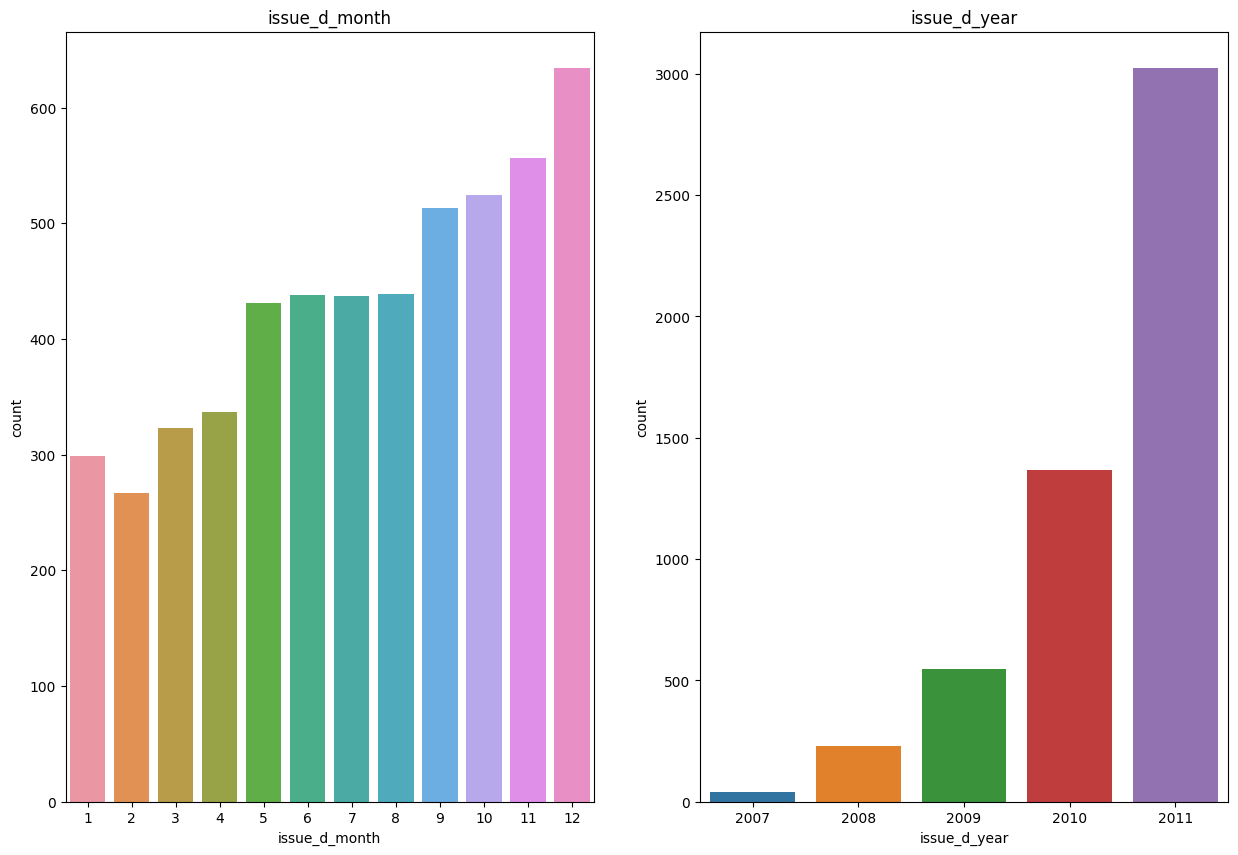

In [30]:
# analysing the issue dates
f, axs = plt.subplots(1, 2, figsize=(15, 10))

sns.countplot(ax=axs[0],x='issue_d_month', data=df_charged_off)
axs[0].set_title("issue_d_month")
sns.countplot(ax=axs[1],x='issue_d_year', data=df_charged_off)
axs[1].set_title("issue_d_year")

plt.show()

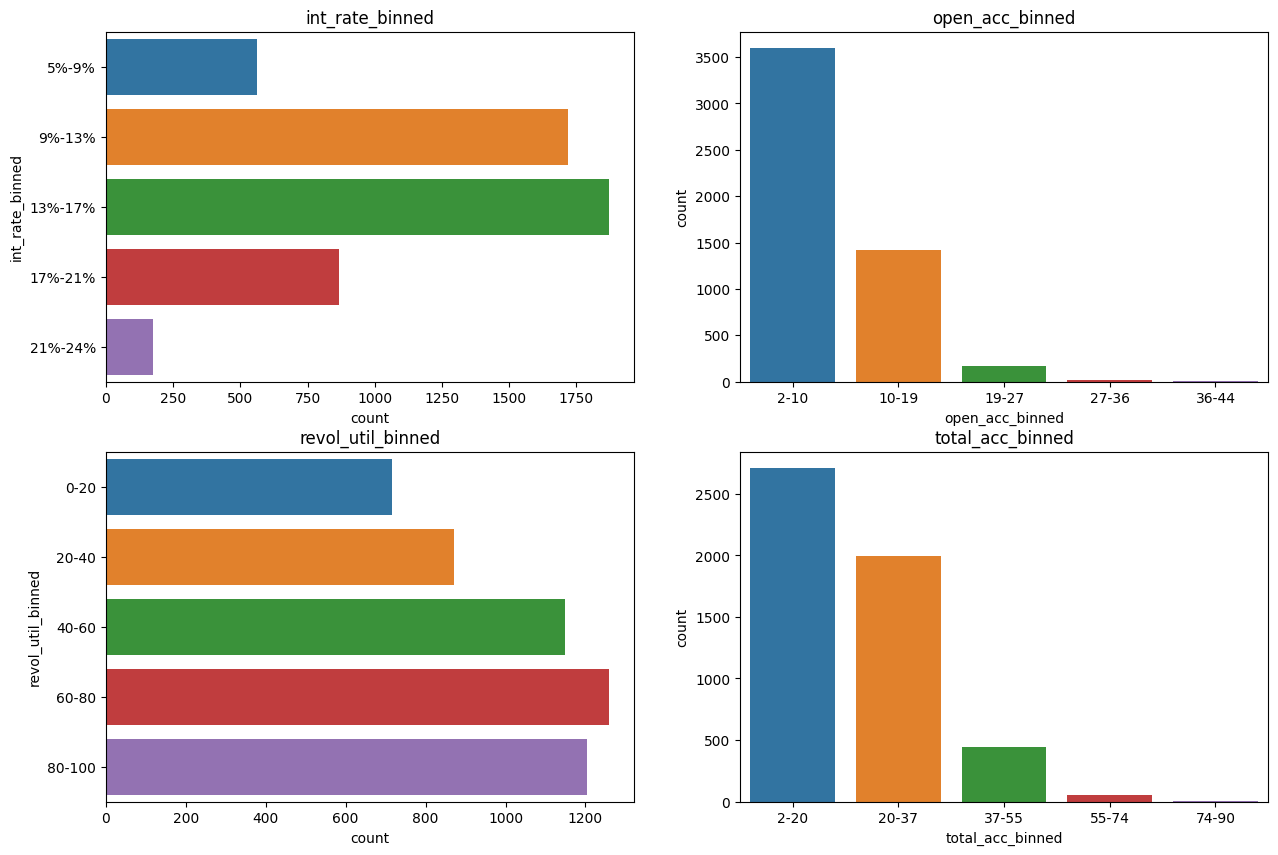

In [31]:
# Analysing int_rate_binned, open_acc_binned, revol_util_binned and total_acc_binned
f, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axs[0][0],
              y='int_rate_binned', 
              data=df_charged_off)
axs[0][0].set_title('int_rate_binned')

sns.countplot(ax=axs[0][1], x='open_acc_binned', data=df_charged_off)
axs[0][1].set_title('open_acc_binned')

sns.countplot(ax=axs[1][0], y='revol_util_binned', data=df_charged_off)
axs[1][0].set_title('revol_util_binned')

sns.countplot(ax=axs[1][1], x='total_acc_binned', data=df_charged_off)
axs[1][1].set_title('total_acc_binned')



plt.show()

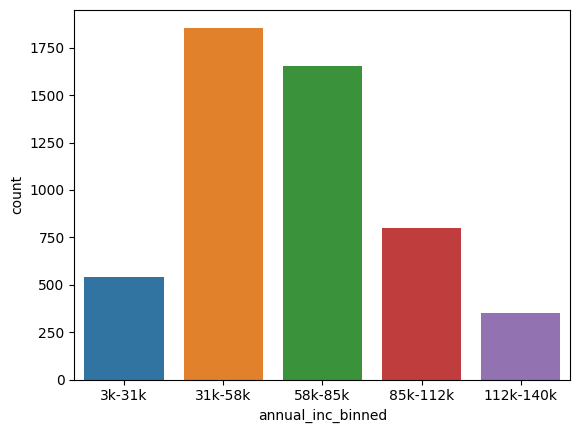

In [32]:
# analysing annual_inc_binned feature
sns.countplot(x='annual_inc_binned', data=df_charged_off)
plt.show()

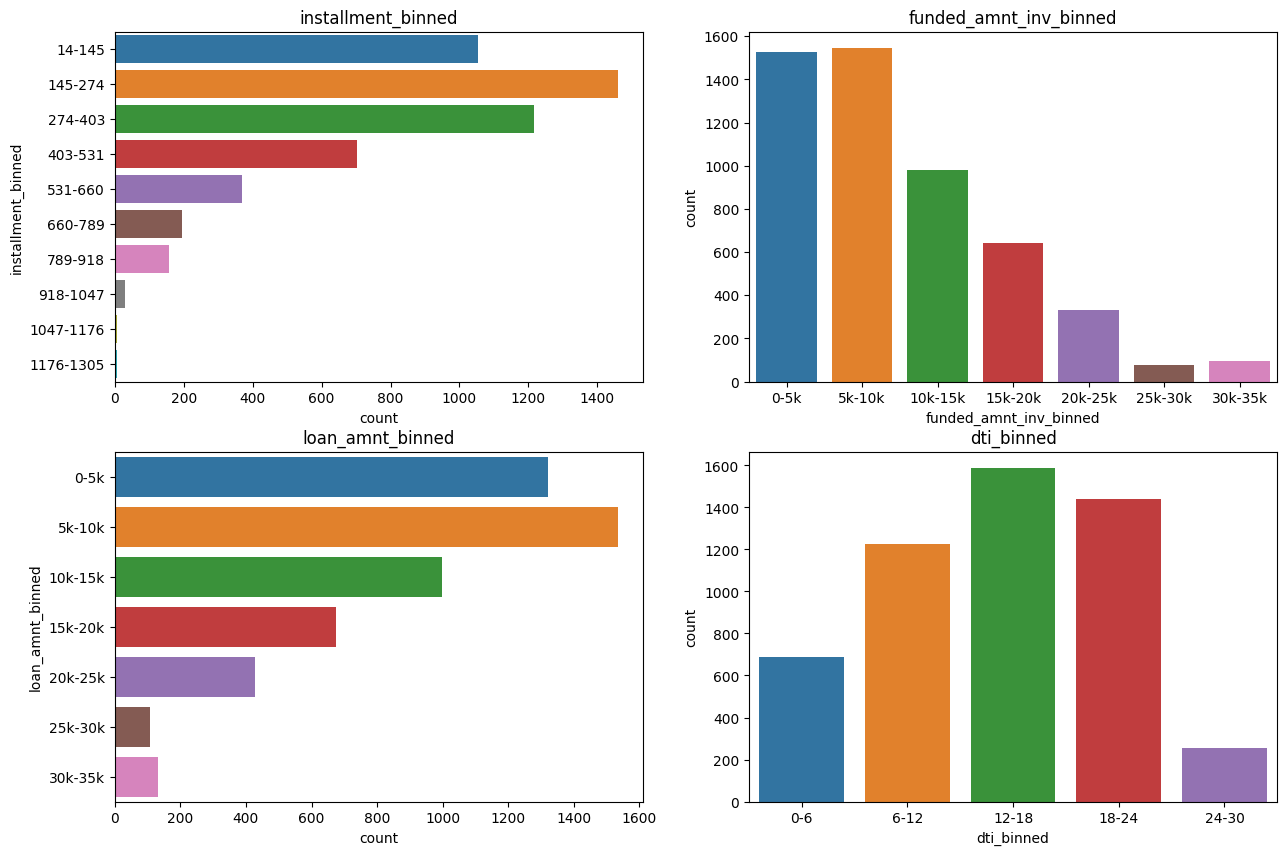

In [33]:
# Analysing installment_binned, funded_amnt_inv_binned, loan_amnt_binned, dti_binned
f, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axs[0][0],
              y='installment_binned', 
              data=df_charged_off)
axs[0][0].set_title('installment_binned')

sns.countplot(ax=axs[0][1], x='funded_amnt_inv_binned', data=df_charged_off)
axs[0][1].set_title('funded_amnt_inv_binned')

sns.countplot(ax=axs[1][0], y='loan_amnt_binned', data=df_charged_off)
axs[1][0].set_title('loan_amnt_binned')

sns.countplot(ax=axs[1][1], x='dti_binned', data=df_charged_off)
axs[1][1].set_title('dti_binned')



plt.show()

### Univariate Analysis Results:     
**<font color='green'>1. There is a higher chance of defaulting for 36 months term</font>**  
**<font color='green'>2. There is a higher chance of defaulting for grades B,C,D. Especially B5,C1,C2,D2 have a high count of Charged off loans</font>**  
**<font color='green'>3. emp_length with 10+ years are most likely to be Charged Off</font>**  
**<font color='green'>4. home_ownership is RENT for many Charged Off loans</font>**  
**<font color='green'>5. Most of the Charged Off loans are not verified</font>**  
**<font color='green'>6. Most of the loans issued in 2011 are defaulters, especially in the months of november and december</font>**  
**<font color='green'>7. Most of the Charged Off loans have an int_rate from 9%-13% , 13-17%</font>**  
**<font color='green'>8. Charged Off loans have an open_acc in the range of 2-10</font>**  
**<font color='green'>9. Charged Off loans have an revol_util in the range of 60-80 and 80-100</font>**  
**<font color='green'>10. Charged Off loans have an total_acc in the range of 2-20 and 20-37</font>**  
**<font color='green'>11. Charged Off loans have an annual_inc in the range of 31k-58k and 58k-85k</font>**     
**<font color='green'>12. Charged Off loans have an installment in the range of 145-274</font>**    
**<font color='green'>13. Charged Off loans have an funded_amt_inv in the range of 0k-5k and 5k-10k</font>**    
**<font color='green'>14. Charged Off loans have an loan_amount in the range of 0k-5k and 5k-10k</font>**    
**<font color='green'>15. Charged Off loans have an dti in the range of 12-18</font>**    


## 6.  Bivariate Analysis:     
    
**In general the repayment of the loan depends on the repaying capability of the borrower, which is his annual income. So performing a bivariate analysis of annual_inc with other features in light of the loan_status being Charged Off**

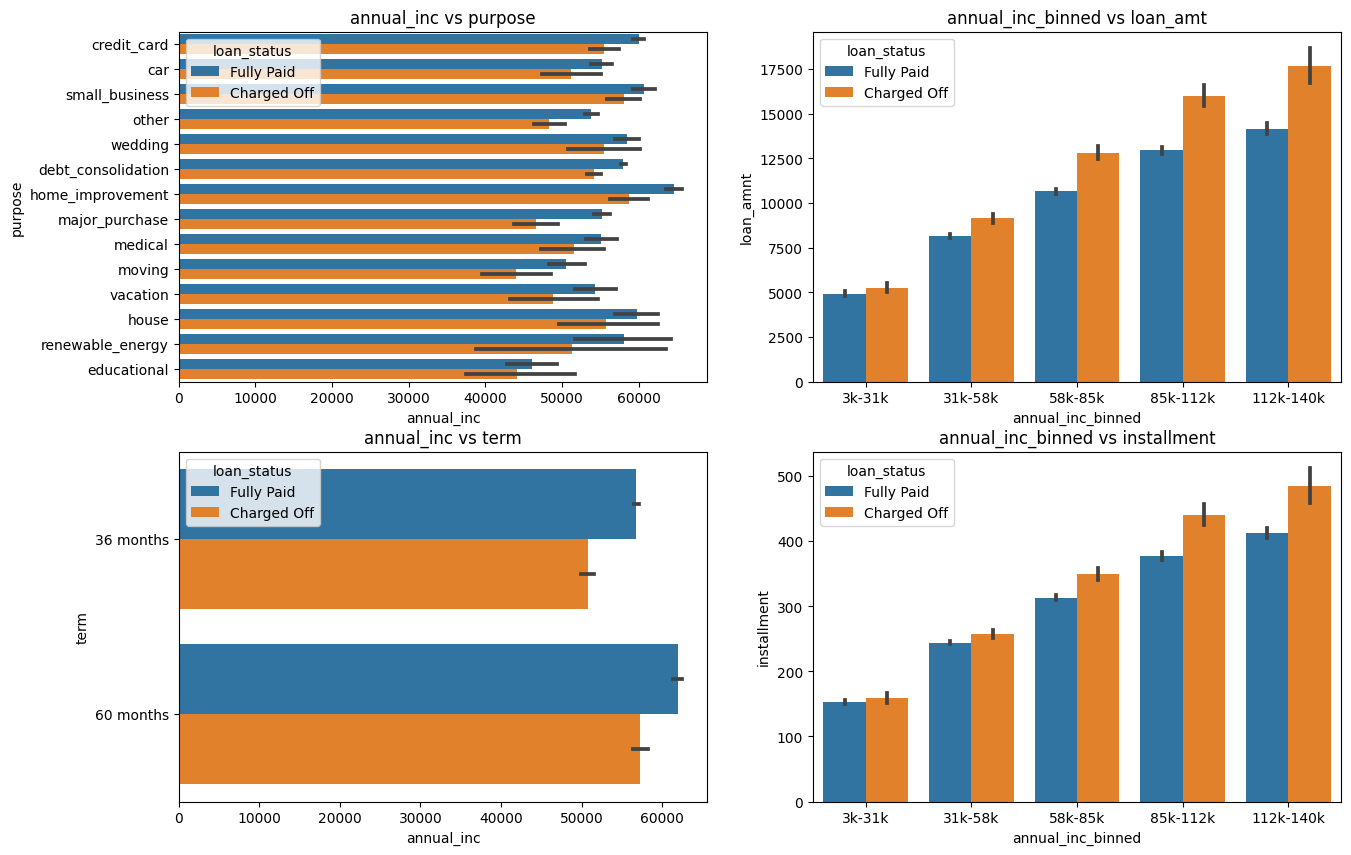

In [34]:
# barplots for bivariate analysis of various features with annual_inc for the Charged Off and Fully paid loans
f, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axs[0][0],data=df_clean,x='annual_inc', y='purpose', hue ='loan_status')
axs[0][0].set_title('annual_inc vs purpose')

sns.barplot(ax=axs[0][1],data=df_clean,x='annual_inc_binned', y='loan_amnt', hue ='loan_status')
axs[0][1].set_title('annual_inc_binned vs loan_amt')

sns.barplot(ax=axs[1][0],data=df_clean,x='annual_inc', y='term', hue ='loan_status')
axs[1][0].set_title('annual_inc vs term')

sns.barplot(ax=axs[1][1],data=df_clean,x='annual_inc_binned', y='installment', hue ='loan_status')
axs[1][1].set_title('annual_inc_binned vs installment')

plt.show()

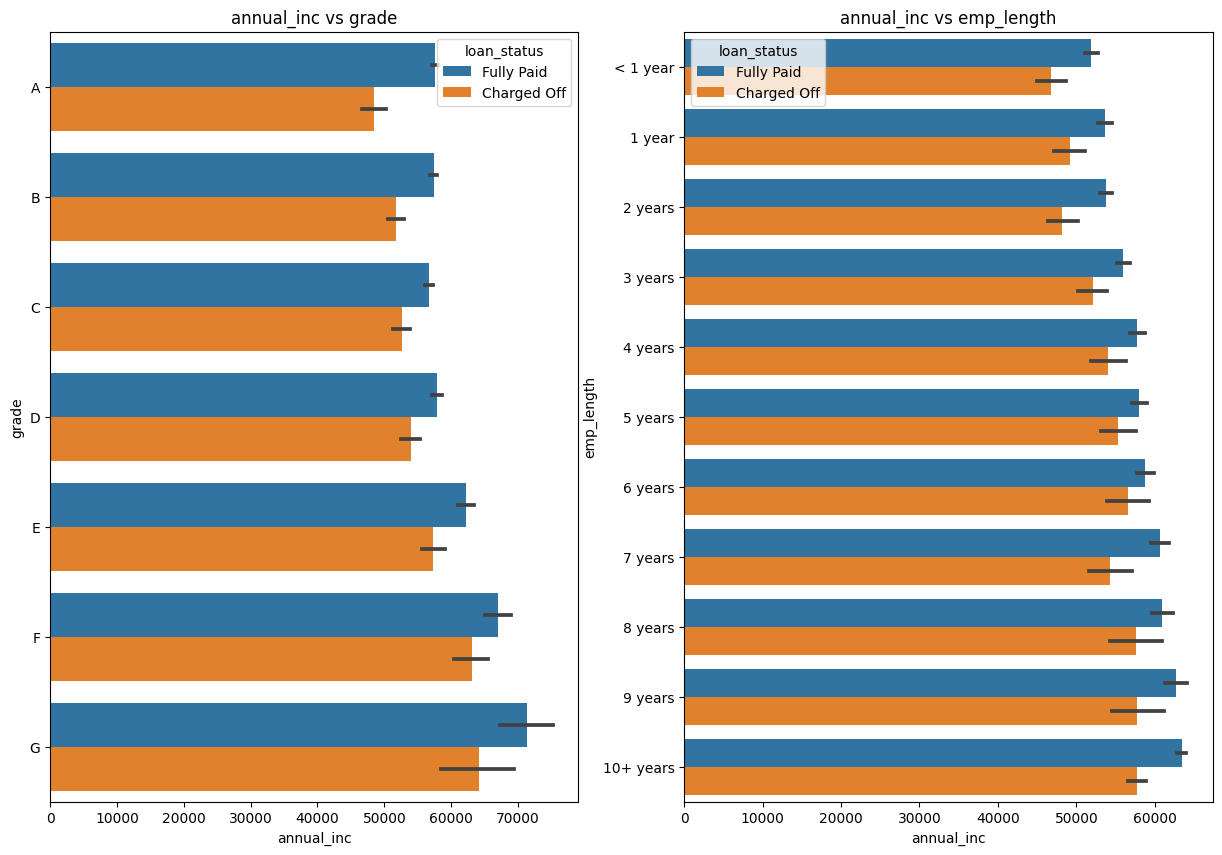

In [35]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))


sns.barplot(ax=axs[0],data=df_clean,x='annual_inc', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
axs[0].set_title('annual_inc vs grade')

sns.barplot(ax=axs[1],data=df_clean,x='annual_inc', y='emp_length', hue ='loan_status',
            order=['< 1 year', 
                     '1 year',
                     '2 years', 
                     '3 years', 
                     '4 years', 
                     '5 years', 
                     '6 years',
                     '7 years', 
                     '8 years', 
                     '9 years', 
                     '10+ years'])
axs[1].set_title('annual_inc vs emp_length')


plt.show()

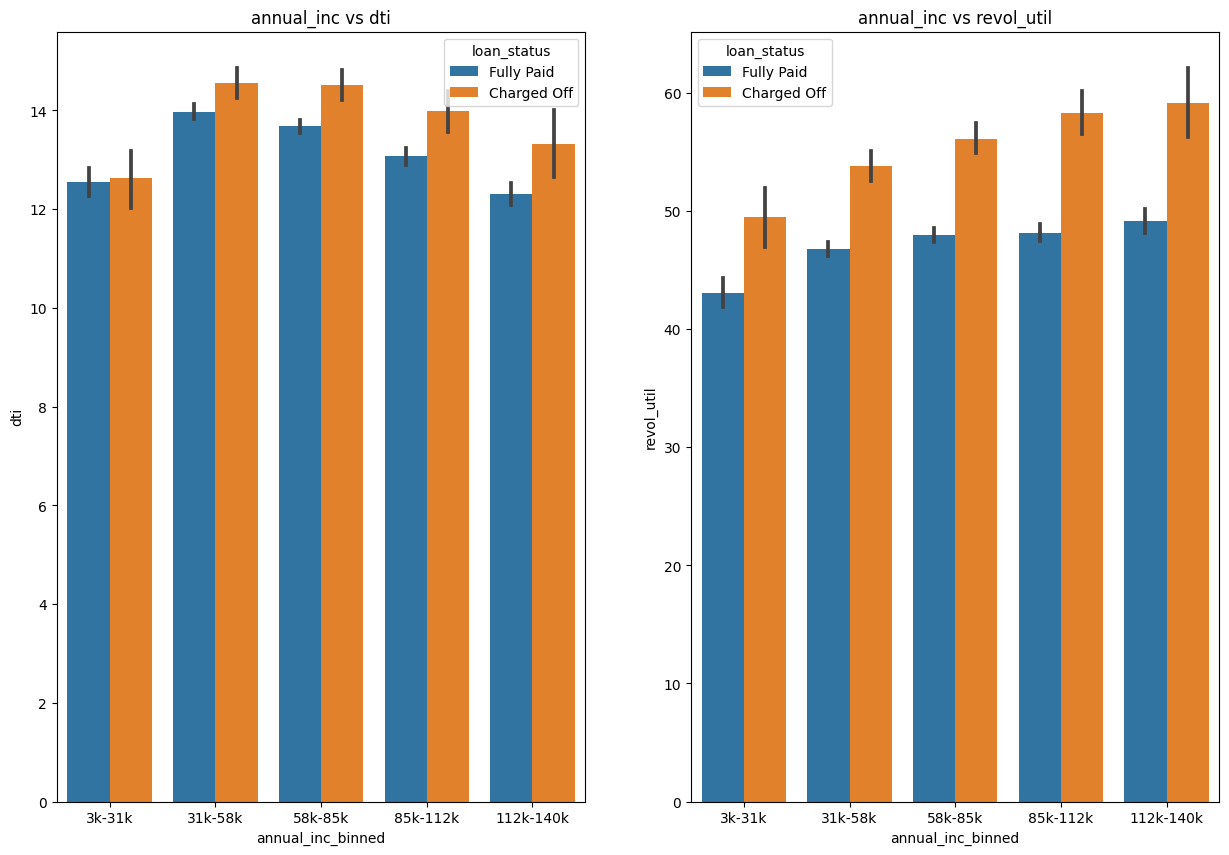

In [36]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))

sns.barplot(ax=axs[0],data=df_clean,x='annual_inc_binned', y='dti', hue ='loan_status')
axs[0].set_title('annual_inc vs dti')

sns.barplot(ax=axs[1],data=df_clean,x='annual_inc_binned', y='revol_util', hue ='loan_status')
axs[1].set_title('annual_inc vs revol_util')


plt.show()

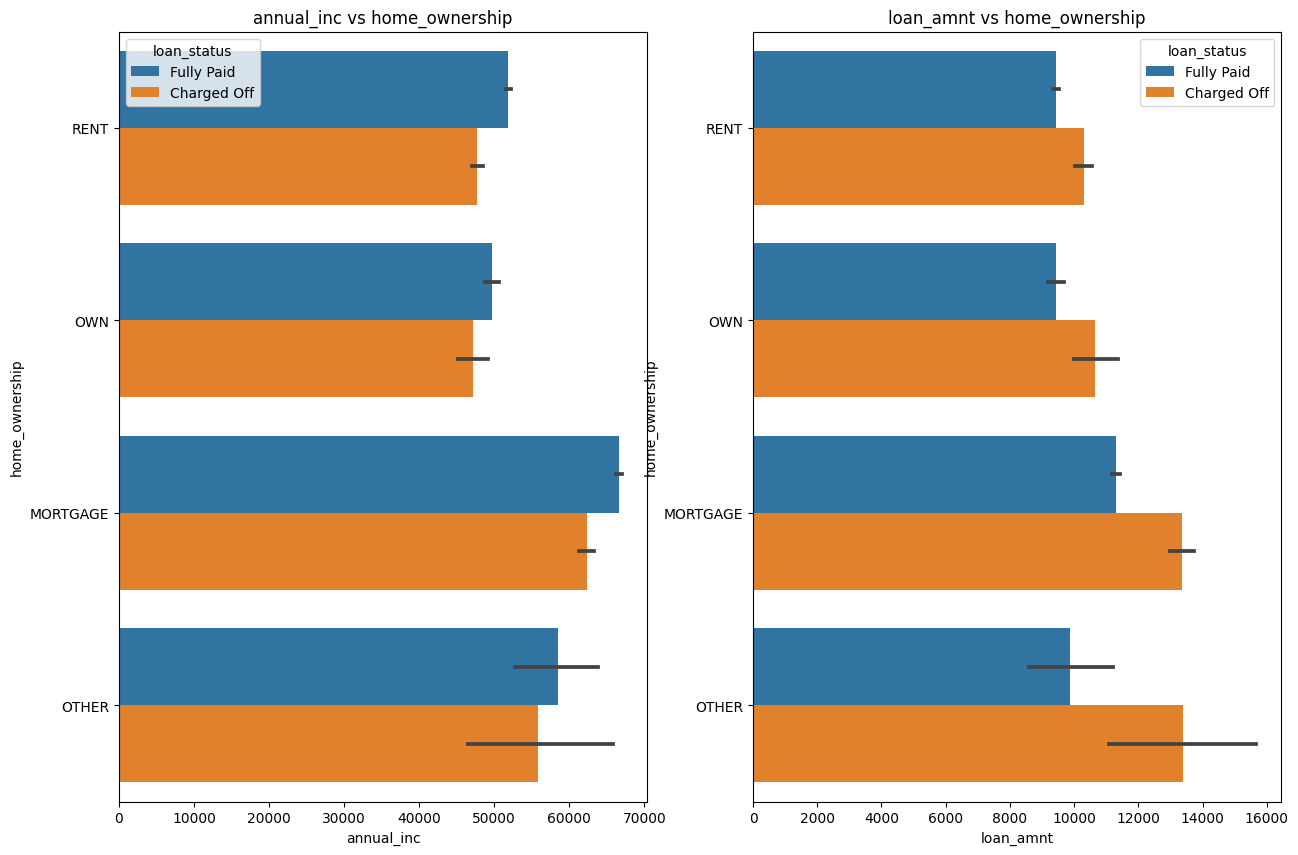

In [37]:
f, axs = plt.subplots(1, 2, figsize=(15, 10))


sns.barplot(ax=axs[0],data=df_clean,x='annual_inc', y='home_ownership', hue ='loan_status')
axs[0].set_title('annual_inc vs home_ownership')


sns.barplot(ax=axs[1],data=df_clean,x='loan_amnt', y='home_ownership', hue ='loan_status')
axs[1].set_title('loan_amnt vs home_ownership')


plt.show()

### Bivariate Analysis Results:    
**<font color='green'>1. Charged off loans are for the loans taken for the purpose of home_improvement</font>**   
**<font color='green'>2. The Charged Off loans in the low income group i.e, 3k-31k are approximately 5k</font>**   
**<font color='green'>3. The Charged Off loans in the high income group i.e, 112k-140k are approximately 17.5k</font>**   
**<font color='green'>4. The Charged Off loans amounts to more than 58k in the 60 months term category. similarly amounts to almost 50k in the 36 months category</font>**    
**<font color='green'>5. The Charged Off loans are having an installment of around 500 in the high income group i.e., 112k-140k. Similarly the Charged Off loans are having an installment of around 150 for the low income group i.e., 3k-31k </font>**    
**<font color='green'>6. The Charged Off loans are highest in the Grade G</font>**    
**<font color='green'>7. As the annual income is higher and the emp_length is higher there is a higher chance of defaulting</font>**    
**<font color='green'>8. Charged Off loans have a dti in the range of 12-14 for the low income group i.e., 3k-31k. Similarly the dti is in the range of 12-14 for the high income group i.e., 112k-140k</font>**    
**<font color='green'>9. The Charged Off Loan amount is in the range of 12k-14k for the borrowers with home_ownership as OTHER.</font>**     
**<font color='green'>10. The Charged Off Loans are very high for the borrowers with home_ownership as MORTGAGE</font>**     
